 # Problem Statement
 
The goal of this project is to analyze the sales data from BigMart, which includes information about 1559 products across 10 stores in different cities. The data scientists aim to build a predictive model that can accurately predict the sales of each product at a specific store.

By developing this model, BigMart hopes to gain insights into the key factors that influence product sales, such as the characteristics of the products themselves and the attributes of the stores. The project involves conducting various analyses and forming hypotheses to identify the properties of products and stores that have a significant impact on sales.

In summary, the project focuses on exploring and understanding the relationships between product and store attributes and their influence on sales. The analysis aims to uncover valuable insights that can help BigMart optimize their strategies for increasing sales.

# Hypothesis Generation

1. City Type : Stores in urban or Tier 1 cities will experience higher sales compared to stores in other locations, attributed to the higher income levels of residents in those areas.
2. Population Density : Stores situated in densely populated areas will observe increased sales due to the higher demand generated by a larger customer base.
3. Location : Stores located in popular marketplaces will likely generate higher sales due to improved accessibility and exposure to a larger customer pool.
4. Marketing : Stores equipped with effective marketing strategies and resources will likely generate higher sales by attracting customers through targeted offers and advertising campaigns.
5. Brand : Branded products are expected to achieve higher sales compared to non-branded products, as customers tend to trust established brands more.
6. Visbility of the product in the store : Products displayed on prominent shelves or at the store entrance are likely to capture customer attention and generate higher sales compared to products placed in less visible areas.
7. Promotional Offers : Products accompanied by compelling promotional offers and discounts are likely to experience increased sales compared to products without such incentives.

# Loading Packages & Data

In [336]:
import os
import numpy as np
import pandas as pd

#plotting
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler

#encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2 
from sklearn.model_selection  import cross_val_score as CVS

#ML models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor


import warnings

warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

In [337]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bigmart-data/Train.csv
/kaggle/input/bigmart-data/Test.csv


In [338]:
df_train = pd.read_csv("../input/bigmart-data/Train.csv")
df_test = pd.read_csv("../input/bigmart-data/Test.csv")

**Merging both datasets**

In [339]:
df = pd.concat([df_train,df_test])

# Data Structure and Content

Preview of the 5 first rows of training set :

In [340]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Preview of the 5 first rows of testing test :

In [341]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


Size of training and test sets :

In [342]:
df_train.shape, df_test.shape

((8523, 12), (5681, 11))

In [343]:
df.shape

(14204, 12)

In [344]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Overview of the training set's structure :

In [345]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Exploratory Data Analysis (EDA)

The number of unique values in each column :

In [346]:
print(df_train.nunique())

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64


**Exploring outliers using box plots**

<function matplotlib.pyplot.show(close=None, block=None)>

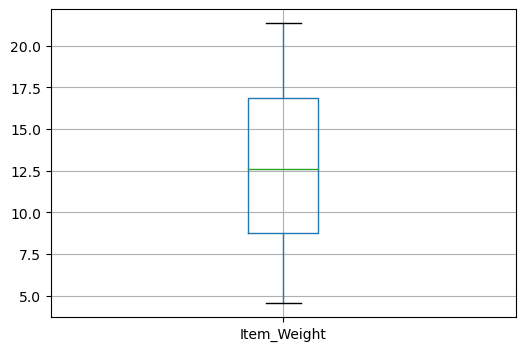

In [347]:
plt.figure(figsize=(6, 4))
df_train.boxplot(column=["Item_Weight"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

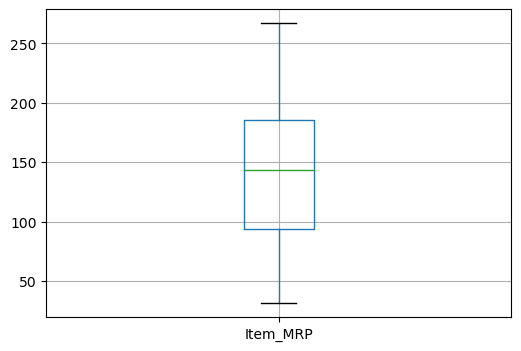

In [348]:
plt.figure(figsize=(6, 4))
df_train.boxplot(column=["Item_MRP"])
plt.show

There are no outliers for Item Weight and Item MRP.

<function matplotlib.pyplot.show(close=None, block=None)>

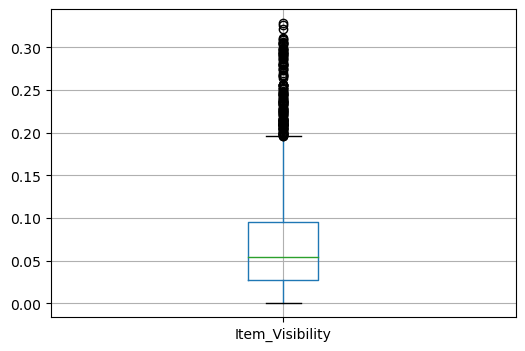

In [349]:
plt.figure(figsize=(6, 4))
df_train.boxplot(column=["Item_Visibility"])
plt.show

Handling the outliers in the Item_Visibility variable :

<function matplotlib.pyplot.show(close=None, block=None)>

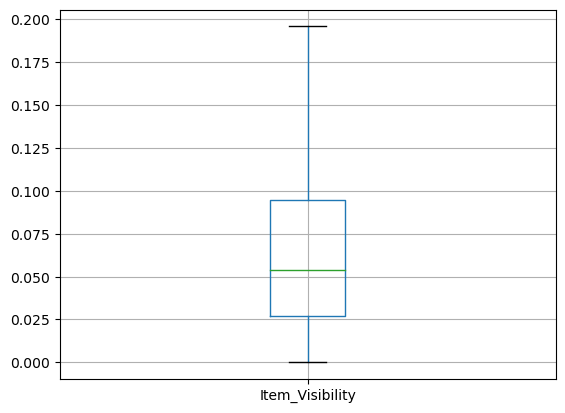

<Figure size 600x400 with 0 Axes>

In [350]:
#calculate the IQR
Q1 = df_train['Item_Visibility'].quantile(0.25)
Q3 = df_train['Item_Visibility'].quantile(0.75)
IQR = Q3 - Q1

#define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#replace the outliers with the IQR boundaries

df_train['Item_Visibility'] = df_train['Item_Visibility'].clip(lower_bound, upper_bound)
df_train.boxplot(column=["Item_Visibility"])
plt.figure(figsize=(6, 4))
plt.show

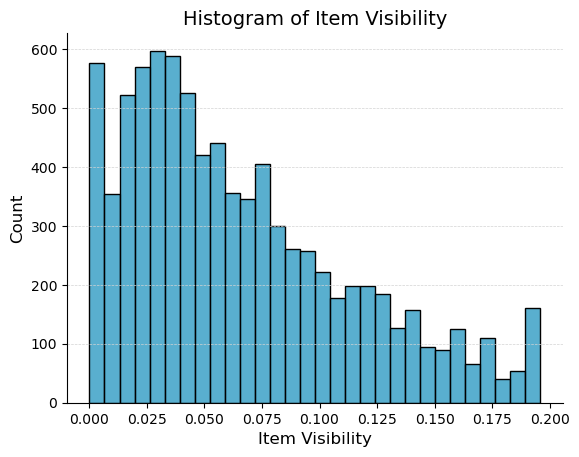

In [351]:
sns.histplot(data=df_train, x='Item_Visibility', color='#2195C0')
plt.title('Histogram of Item Visibility', fontsize=14)
plt.xlabel('Item Visibility', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.grid(axis='y', linestyle='--', linewidth=0.5, color='lightgray')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

**The correlation between numerical columns**

In [352]:
print(df_train.corr())

                           Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.013568  0.027141   
Item_Visibility              -0.013568         1.000000 -0.001163   
Item_MRP                      0.027141        -0.001163  1.000000   
Outlet_Establishment_Year    -0.011588        -0.064105  0.005020   
Item_Outlet_Sales             0.014123        -0.117918  0.567574   

                           Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Weight                                -0.011588           0.014123  
Item_Visibility                            -0.064105          -0.117918  
Item_MRP                                    0.005020           0.567574  
Outlet_Establishment_Year                   1.000000          -0.049135  
Item_Outlet_Sales                          -0.049135           1.000000  


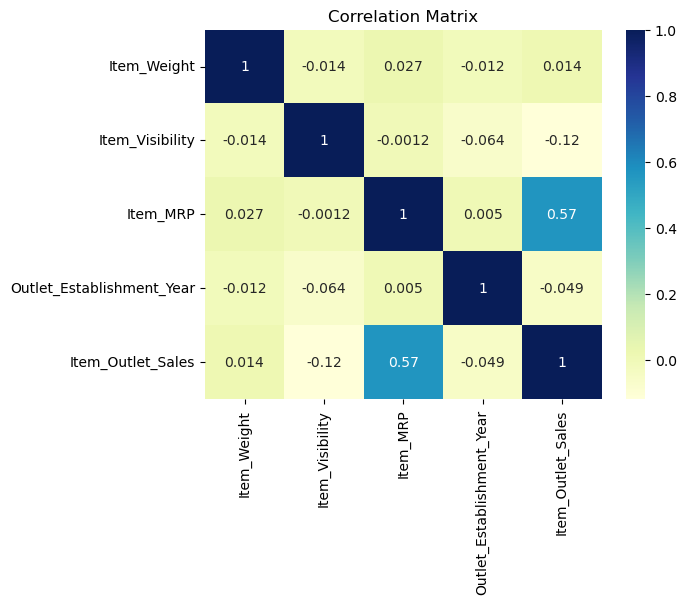

In [353]:
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.show()

The correlation value **(~0.57)** - a moderate positive correlation- indicates that that there is a moderate relationship between the **maximum retail price (MRP)** of an item and its **sales **:

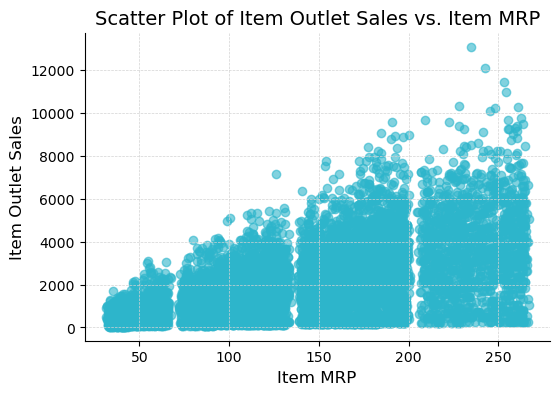

In [354]:
plt.figure(figsize=(6, 4))
plt.scatter(df_train['Item_MRP'], df_train['Item_Outlet_Sales'], color='#2DB5CB', alpha=0.6)
plt.xlabel('Item MRP', fontsize=12)
plt.ylabel('Item Outlet Sales', fontsize=12)
plt.title('Scatter Plot of Item Outlet Sales vs. Item MRP', fontsize=14)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.grid(linestyle='--', linewidth=0.5, color='lightgray')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

The scatter plot suggests a potential positive relationship between Item MRP and Item Outlet Sales. As the Item MRP increases, there is a general trend of higher Item Outlet Sales.

# Univariate Analysis

First, let's check the categorical columns :

In [355]:
catg_columns = df_train.select_dtypes(include=['object']).columns.tolist()
catg_columns

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

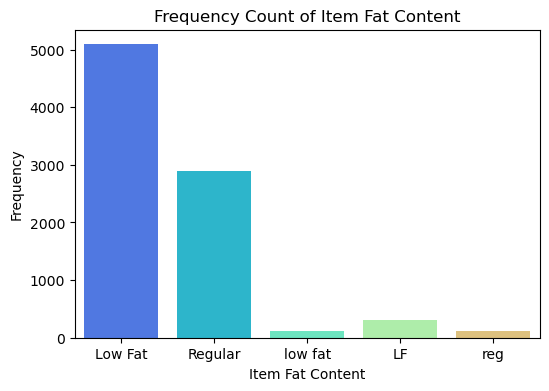

In [356]:
#calculate frequency counts
frequency = df_train['Item_Fat_Content'].value_counts()

#visualize frequency counts
plt.figure(figsize=(6, 4))
color_palette = sns.color_palette(palette='rainbow')
sns.countplot(data=df_train, x='Item_Fat_Content', palette=color_palette)
plt.xlabel('Item Fat Content')
plt.ylabel('Frequency')
plt.title('Frequency Count of Item Fat Content')
plt.show()

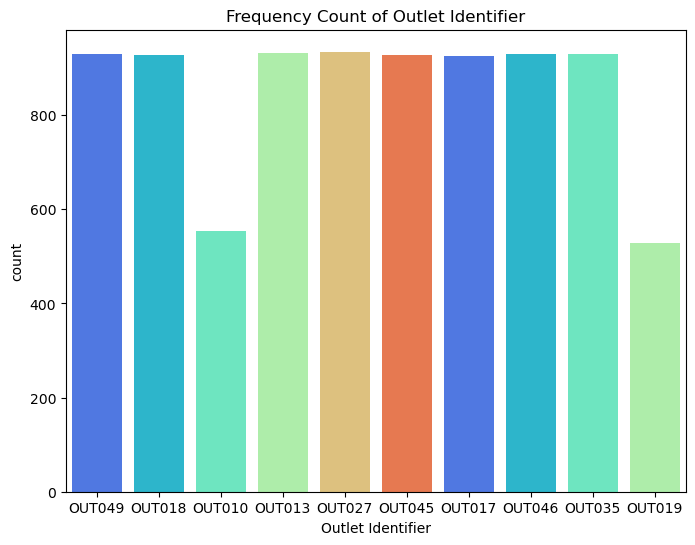

In [357]:
plt.figure(figsize=(8, 6))
color_palette = sns.color_palette(palette='rainbow')
sns.countplot(data=df_train, x='Outlet_Identifier', palette=color_palette)
plt.xlabel('Outlet Identifier')
plt.title('Frequency Count of Outlet Identifier')
plt.show()

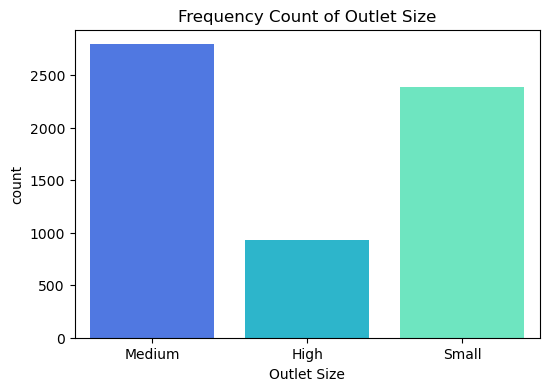

In [358]:
plt.figure(figsize=(6, 4))
color_palette = sns.color_palette(palette='rainbow')
sns.countplot(data=df_train, x='Outlet_Size', palette=color_palette)
plt.xlabel('Outlet Size')
plt.title('Frequency Count of Outlet Size')
plt.show()

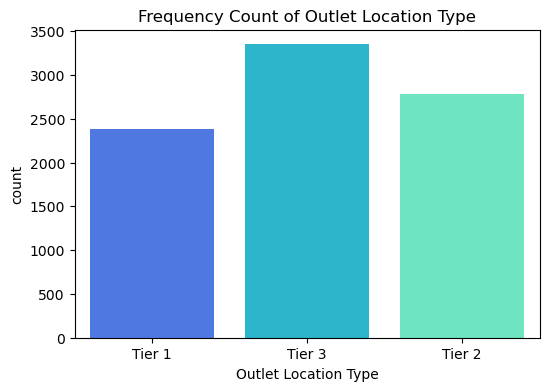

In [359]:
plt.figure(figsize=(6, 4))
color_palette = sns.color_palette(palette='rainbow')
sns.countplot(data=df_train, x='Outlet_Location_Type', palette=color_palette)
plt.xlabel('Outlet Location Type')
plt.title('Frequency Count of Outlet Location Type')
plt.show()

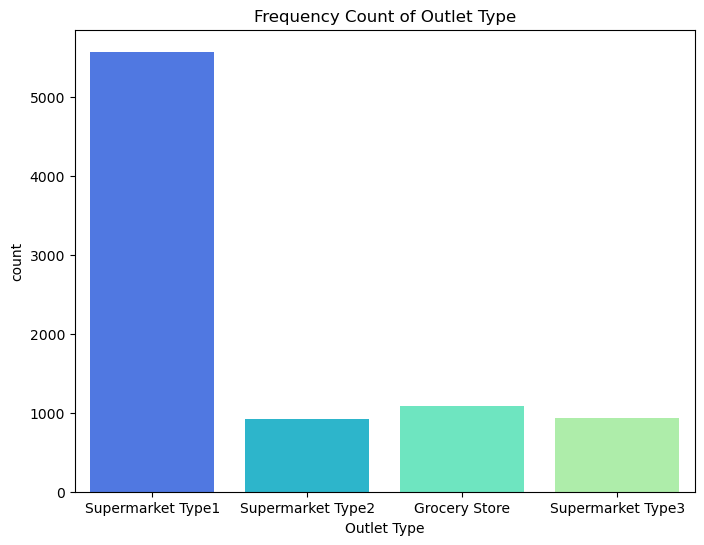

In [360]:
plt.figure(figsize=(8, 6))
color_palette = sns.color_palette(palette='rainbow')
sns.countplot(data=df_train, x='Outlet_Type', palette= color_palette)
plt.xlabel('Outlet Type')
plt.title('Frequency Count of Outlet Type')
plt.show()

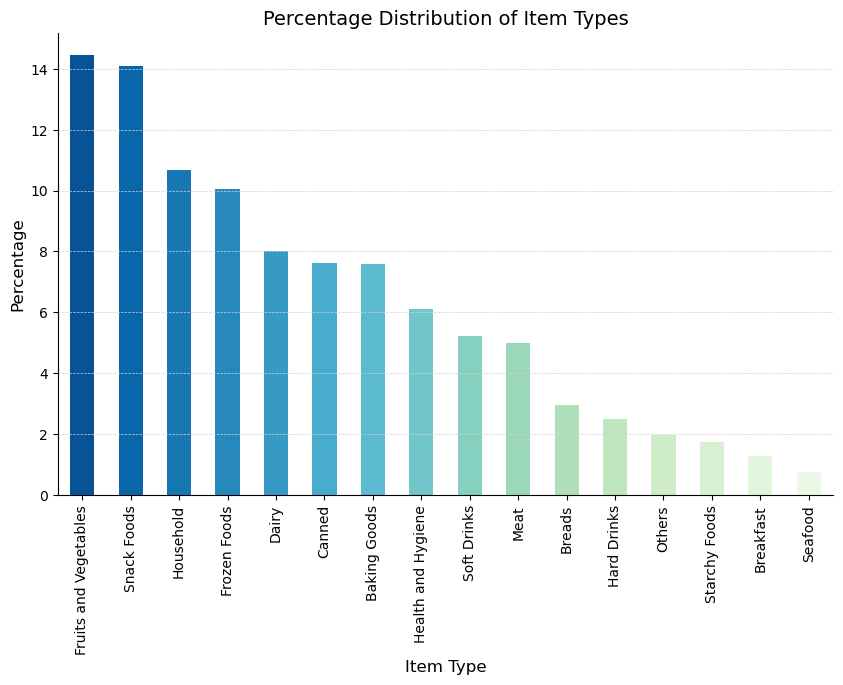

In [361]:
#calculate proportions or percentages
proportions = df_train['Item_Type'].value_counts(normalize=True) * 100

#visualize proportions
plt.figure(figsize=(10, 6))
color_palette = sns.color_palette('GnBu_r', len(proportions))
proportions.plot(kind='bar', color=color_palette)

plt.xlabel('Item Type', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title('Percentage Distribution of Item Types', fontsize=14)

plt.xticks(rotation=90)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.grid(axis='y', linestyle='--', linewidth=0.5, color='lightgray')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

**Analysis for categorical columns :**
* Item_Fat_Content : Low-fat items are more sold.
* Outlet_Identifier : Most outlets in the dataset have a relatively even distribution of sales, expect for OUT010 and OUT019.
* Outlet_Size : Medium-sized outlets are the most common in the dataset.
* Outlet_Location_Type : Tier3 is the most common outlet location type.
* Outlet_Type : Supermarket Type1 dominates the dataset in terms of outlet types.
* Item_Type : Fruits and vegetables, and snack foods are the most popular item types.

Now, let's check the numerical columns :

In [362]:
num_columns = df_train.select_dtypes('number').columns.to_list()
num_columns

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

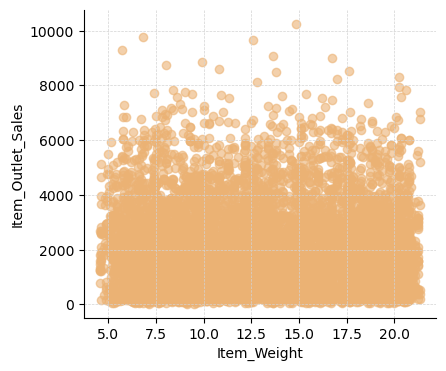

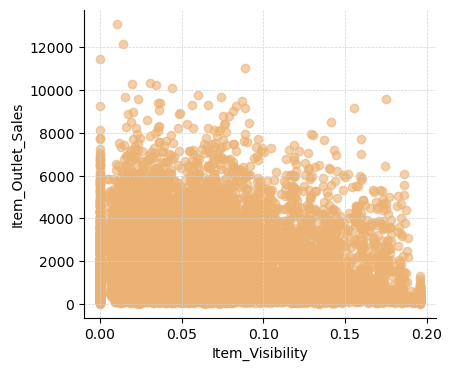

In [363]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 2)
plt.scatter(df_train['Item_Weight'], df_train['Item_Outlet_Sales'], color='#EBB274', alpha=0.6)
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(linestyle='--', linewidth=0.5, color='lightgray')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 2)
plt.scatter(df_train['Item_Visibility'], df_train['Item_Outlet_Sales'], color='#EBB274', alpha=0.6)
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(linestyle='--', linewidth=0.5, color='lightgray')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

**Analysis for numerical columns :**
* Item_Weight : The data is very well spreaded.
* Item_Visibility : Same realization, it appears well spreaded.
* Item_MRP : As we saw before, items with higher MRP tend to have better sales.

# Bivariate Analysis

Let's check the relationship between Item_Outlet_Sales and Outlet_Identifier, Outlet_Size, Outlet_Location_Type, Outlet_Type :

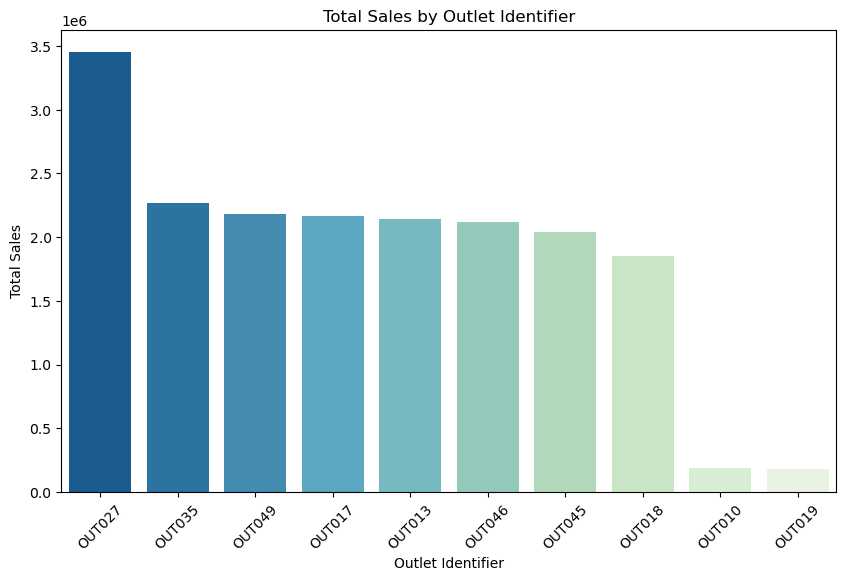

In [364]:
#grouping the data by Outlet Identifier and calculating the sum of Item Outlet Sales
sales_by_outlet = df_train.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().sort_values(ascending=False)

#creating the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_outlet.index, y=sales_by_outlet.values, palette='GnBu_r')
plt.xlabel('Outlet Identifier')
plt.ylabel('Total Sales')
plt.title('Total Sales by Outlet Identifier')
plt.xticks(rotation=45)
plt.show()

In [365]:
def plot_bar(data, x, y, title):
    #grouping the data by the specified x variable and calculating the mean of the y variable
    grouped_data = data.groupby(x)[y].mean().sort_values(ascending=False)

    #creating the bar plot
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(x=grouped_data.index, y=grouped_data.values, palette='rainbow')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(axis='y', linestyle='--', linewidth=0.5, color='lightgray')

    plt.xlabel(x, fontsize=12)
    plt.ylabel('Average ' + y, fontsize=12)
    plt.title('Average ' + y + ' by ' + x, fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)

    plt.tight_layout()
    plt.show()

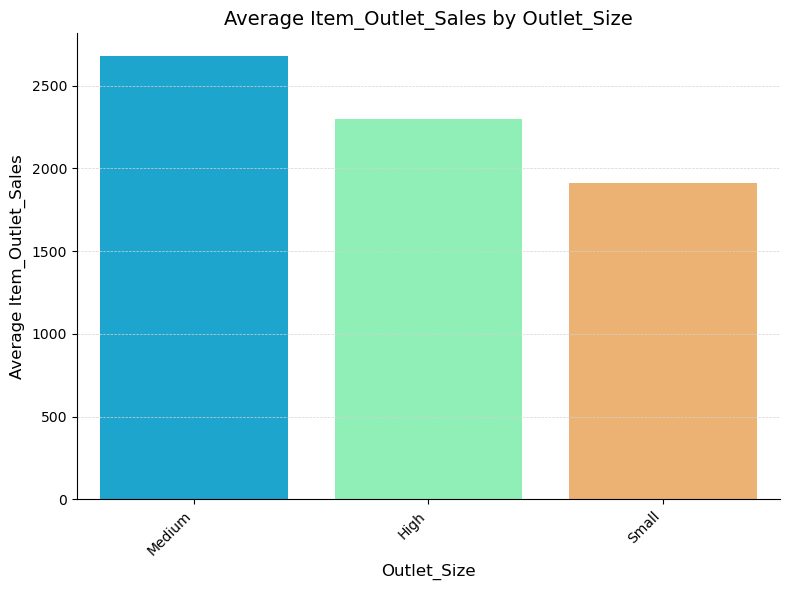

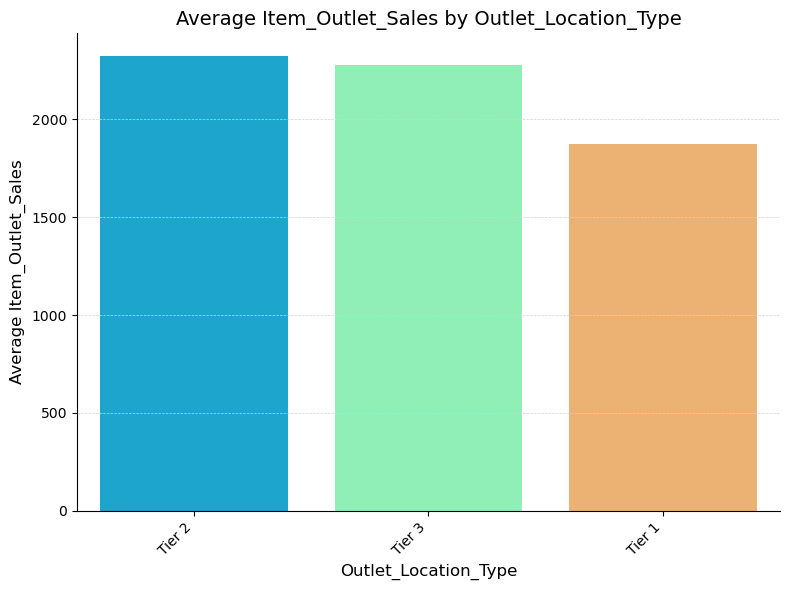

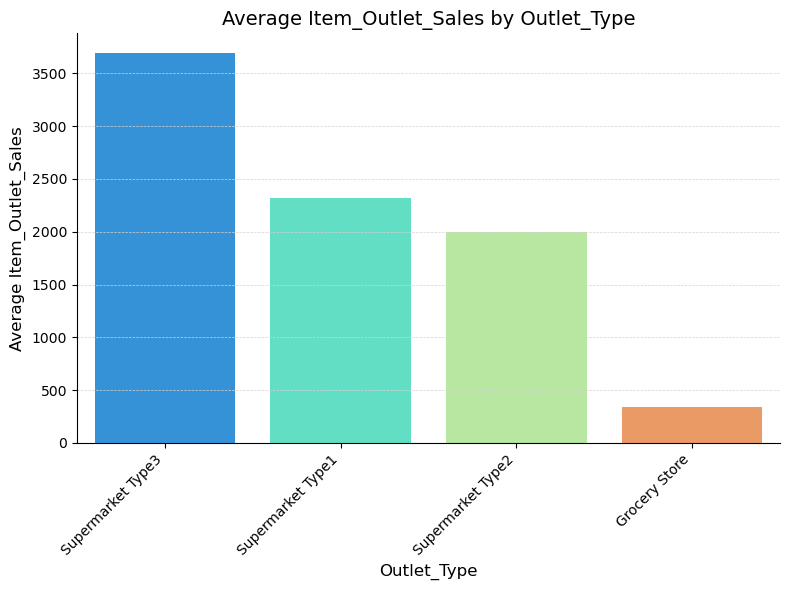

In [366]:
plot_bar(df_train, 'Outlet_Size', 'Item_Outlet_Sales', 'Outlet Size')

plot_bar(df_train, 'Outlet_Location_Type', 'Item_Outlet_Sales', 'Outlet Location Type')

plot_bar(df_train, 'Outlet_Type', 'Item_Outlet_Sales', 'Outlet Type')

**Analysis :**
* Outlet 27 has exceptionally high Item Outlet Sales compared to others, so it generates the highest profits, while Outlet 10 and Outlet 19 exhibit significantly lower sales.
* Medium-sized outlets have slightly higher sales compared to high-sized outlets.
* Tier 2 and 3 have the highest sales.
* Supermarket Type 3 is the most profitable among the different types of supermarkets, even though supermarket type 1 dominates the dataset as we've seen previously.

# Missing values treatment

In [367]:
#checking for missing values in all columns (in training and testing sets)
missing_values_train = df_train.isnull().sum()
print(missing_values_train,"\n")
missing_values_test = df_test.isnull().sum()
print(missing_values_test)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64 

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


In [368]:
missing_values = df.isnull().sum()

total_cells = np.product(df.shape)
tr_total_cells = np.product(df_train.shape)
total_missing = missing_values.sum()
tr_total_missing = missing_values_train.sum()

percent_missing = (total_missing/total_cells) * 100
print("Percent of data that is missing in the whole dataset : ", percent_missing)
percent_missing_train = (tr_total_missing/tr_total_cells) * 100
print("Percent of training data that is missing : ", percent_missing_train)

Percent of data that is missing in the whole dataset :  7.120060076973623
Percent of training data that is missing :  3.786812155344362


In [369]:
print("Item_Weight:\n",df_train.Item_Weight.value_counts(),"\n\n")
print("Outlet_Size:\n",df_train.Outlet_Size.value_counts(),"\n\n")

Item_Weight:
 12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64 


Outlet_Size:
 Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64 




**Handling 'Item_Weight' missing values**

Imputing the missing values in 'Item_Weight' (numerical column) with the mean weight :

In [370]:
#impute missing values with mean weight in training set
df_train['Item_Weight'] = df_train['Item_Weight'].fillna(df_train['Item_Weight'].dropna().mean())

#impute missing values with mean weight in testing set
df_test['Item_Weight'] = df_test['Item_Weight'].fillna(df_test['Item_Weight'].dropna().mean())

**Handling 'Outlet_Size' missing values**

Imputing the missing values in 'Outlet_Size' (categorical column) with the mode (the most frequently occurring category) :

In [371]:
#impute missing values with mode for Outlet_Size column
mode_value = df_train['Outlet_Size'].mode()[0]
print("Train mode value : ", mode_value)
df_train['Outlet_Size'] = df_train['Outlet_Size'].fillna(mode_value)

mode_value2 = df_test['Outlet_Size'].mode()[0]
print("Test mode value : ", mode_value2)
df_test['Outlet_Size'] = df_test['Outlet_Size'].fillna(mode_value2)

Train mode value :  Medium
Test mode value :  Medium


In [372]:
print("Training set's info :\n")
print(df_train.info())
print("\n\nTesting set's info :\n")
print(df_test.info())

Training set's info :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


Testing set's i

We can see that we have filled all missing values for both training and testing sets. 

# Feature Engineering

**Correcting Item_Fat_Content variable's categories**

"Low Fat", "LF", and "low fat" refer to the same category. And same goes for "Regular'and "reg". Let's correct these typos :

In [373]:
print(df_train['Item_Fat_Content'].value_counts())

print('\nCategories after correction :')
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace({'LF':'Low Fat',
                              'low fat':'Low Fat',
                              'reg':'Regular'})
df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].replace({'LF':'Low Fat',
                              'low fat':'Low Fat',
                              'reg':'Regular'})

print(df_train['Item_Fat_Content'].value_counts())

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Categories after correction :
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


In the Item Visibility Histogram that we plotted in the EDA phase, we can see that some items have the value 0 for Item_Visibilty (the minimum value), which doesn't really make sense.

In [374]:
df_train.Item_Visibility.describe()

count    8523.000000
mean        0.065307
std         0.048841
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.195979
Name: Item_Visibility, dtype: float64

**Creating a broad category of Item_Type**

If we take a look at Item_Identifier, we notice that it starts either with FD, DR or NC. It looks like FD stands for Food, DR for Drinks, and NC for Non-Consumables. So we can create a new column for these categories :

In [375]:
#retrieve the first two characters of Item_Identifier
df_train['Item_Category'] = df_train['Item_Identifier'].apply(lambda x: x[0:2])
df_test['Item_Category'] = df_test['Item_Identifier'].apply(lambda x: x[0:2])
#rename them
df_train['Item_Category'] = df_train['Item_Category'].map({'FD':'Food',
                                                             'DR':'Drinks',
                                                             'NC':'Non-Consumable'})
df_test['Item_Category'] = df_test['Item_Category'].map({'FD':'Food',
                                                             'DR':'Drinks',
                                                             'NC':'Non-Consumable'})
df_train['Item_Category'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Category, dtype: int64

But, as we saw above, some items are non-consumable. Therefore, it's not appropriate to specify a fat content for these items. It would be more beneficial to create a distinct category specifically for these types of observations :

In [376]:
df_train.loc[df_train['Item_Category']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
df_train['Item_Category'].value_counts()
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93,Non-Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable


**Modifying 0 values in Item_Visibility**

In the Histogram of Item Visibility that we plotted in the EDA phase, we notice that some items has the value 0 for 'Item_Visibility' (the minimum value), which doesn't really make sense.

In [377]:
print(df_train.Item_Visibility.describe())

count    8523.000000
mean        0.065307
std         0.048841
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.195979
Name: Item_Visibility, dtype: float64


So, it's better if we impute these values with the mean visibility of the corresponding item :

In [378]:
#calculate the mean visibility of each item
item_visibility_mean = df_train.groupby('Item_Identifier')['Item_Visibility'].transform('mean')

#replace 0 values with NaN in 'Item_Visibility' column
df_train['Item_Visibility'] = df_train['Item_Visibility'].replace(0, float('nan'))
df_test['Item_Visibility'] = df_test['Item_Visibility'].replace(0, float('nan'))

#impute NaN values with mean visibility of the corresponding item
df_train['Item_Visibility'] = df_train['Item_Visibility'].fillna(item_visibility_mean)
df_test['Item_Visibility'] = df_test['Item_Visibility'].fillna(item_visibility_mean)

print(df_train['Item_Visibility'])
print(df_train.Item_Visibility.describe())

0       0.016047
1       0.019278
2       0.016760
3       0.015274
4       0.008082
          ...   
8518    0.056783
8519    0.046982
8520    0.035186
8521    0.145221
8522    0.044878
Name: Item_Visibility, Length: 8523, dtype: float64
count    8523.000000
mean        0.068784
std         0.046924
min         0.003575
25%         0.031114
50%         0.056922
75%         0.097160
max         0.195979
Name: Item_Visibility, dtype: float64


# Encoding Categorical Variables

Let's take a look again at the categorical columns :

In [379]:
catg_columns

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

'Item_Identifier' and 'Outlet_Identifier' don't have any inherent order or significant values, it's best to drop these columns :

In [380]:
columns_to_drop = ['Item_Identifier', 'Outlet_Identifier']
df_train.drop(columns=columns_to_drop, inplace=True)
df_test.drop(columns=columns_to_drop, inplace=True)

df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,19.20,Regular,0.015274,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800,Food
4,8.93,Non-Edible,0.008082,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable


# Label Encoding

'Item_Fat_Content', 'Outlet_Size' and 'Outlet_Location_Type' are **ordinal variables**, so we can encode them using Label Encoding.

In [381]:
label_encoder = LabelEncoder()
columns_to_encode = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type']
for column in columns_to_encode:
    df_train[column] = label_encoder.fit_transform(df_train[column])
    df_test[column] = label_encoder.transform(df_test[column])
    
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category
0,9.30,0,0.016047,Dairy,249.8092,1999,1,0,Supermarket Type1,3735.1380,Food
1,5.92,2,0.019278,Soft Drinks,48.2692,2009,1,2,Supermarket Type2,443.4228,Drinks
2,17.50,0,0.016760,Meat,141.6180,1999,1,0,Supermarket Type1,2097.2700,Food
3,19.20,2,0.015274,Fruits and Vegetables,182.0950,1998,1,2,Grocery Store,732.3800,Food
4,8.93,1,0.008082,Household,53.8614,1987,0,2,Supermarket Type1,994.7052,Non-Consumable


# One Hot Encoding

The variables 'Item_Type' and 'Outlet_Type' can be encoded using one-hot encoding to create binary columns for each type.

In [382]:
#columns to apply one-hot encoding
cols = ['Item_Category','Item_Type', 'Outlet_Type']

#initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

#fit and transform the training set
OH_cols_train = encoder.fit_transform(df_train[cols])
OH_cols_train = pd.DataFrame(OH_cols_train)

#get the unique categories for each column
categories = encoder.categories_
feature_names = []
for i, col in enumerate(cols):
    unique_values = categories[i]
    feature_names.extend([f"{col}_{value}" for value in unique_values])

#assign column names to the one-hot encoded features
OH_cols_train.columns = feature_names

#transform the test set
OH_cols_test = encoder.transform(df_test[cols])
OH_cols_test = pd.DataFrame(OH_cols_test)
OH_cols_test.columns = feature_names

#concatenate the one-hot encoded columns with the original data frames
df_train = pd.concat([df_train.drop(cols, axis=1), OH_cols_train], axis=1)
df_test = pd.concat([df_test.drop(cols, axis=1), OH_cols_test], axis=1)

df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Category_Drinks,Item_Category_Food,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0,0.016047,249.8092,1999,1,0,3735.1380,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,5.92,2,0.019278,48.2692,2009,1,2,443.4228,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,17.50,0,0.016760,141.6180,1999,1,0,2097.2700,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,19.20,2,0.015274,182.0950,1998,1,2,732.3800,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,8.93,1,0.008082,53.8614,1987,0,2,994.7052,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Data Preprocessing 

In [383]:
#exporting files as updated versions
df_train.to_csv("updated_train.csv",index=False)
df_test.to_csv("updated_test.csv",index=False)

**Splitting the data into Training data & Validation Data**

In [384]:
y = df_train['Item_Outlet_Sales']
X = df_train.drop('Item_Outlet_Sales', axis = 1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size = 0.8, test_size=0.2,
                                                    random_state = 0)
X_test = df_test.copy()

In [385]:
print(X_train.shape, X_valid.shape)

(6818, 30) (1705, 30)


**Cross-Validation Score after modeling**

In [386]:
def cross_val(model, X, y, cv):
    scores = CVS(model, X, y, cv=cv)
    print(f'{model} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model} score: {round(scores.mean(),4)}')

# Linear Regression

In [387]:
#create a linear regression model
lin_model = LinearRegression()

#fit the model to the training data
lin_model.fit(X_train, y_train)

#predict on the validation data
y_pred = lin_model.predict(X_valid)

#score metrics 
LR_MAE = MAE(y_valid, y_pred)
LR_MSE = MSE(y_valid, y_pred)
LR_R_2 = R2(y_valid, y_pred)
print(f" Mean Absolute Error: {LR_MAE}\n")
print(f" Squared Mean Squared Error: {np.sqrt(LR_MSE)}\n")
print(f" R^2 Score: {LR_R_2}\n")

#cross validation score
cross_val(LinearRegression(),X,y,5)

 Mean Absolute Error: 852.4240528869651

 Squared Mean Squared Error: 1132.9567655508952

 R^2 Score: 0.5614442533752864

LinearRegression() Scores:
0.57
0.55
0.55
0.56
0.56
Average LinearRegression() score: 0.5579


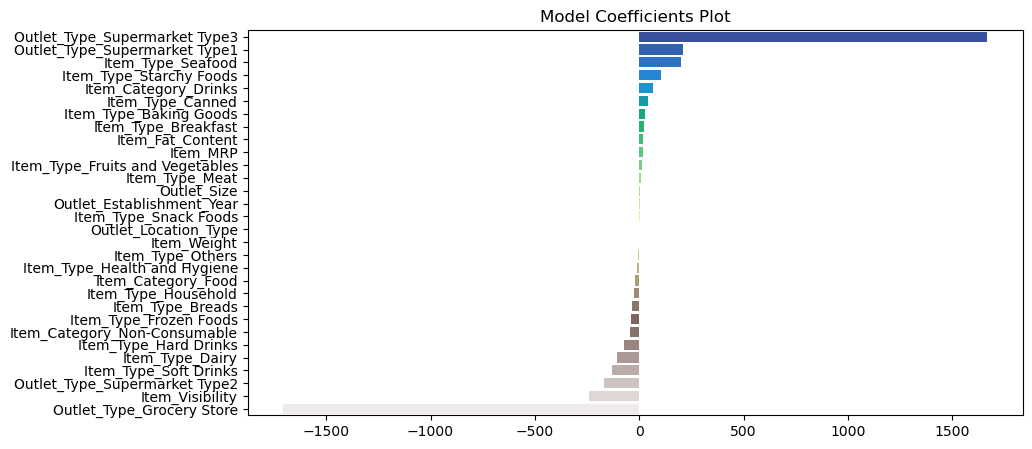

In [388]:
#create a Series with feature importances and sort it
importance_series = pd.Series(lin_model.coef_, index=X_train.columns).sort_values(ascending=False)

#plotting the feature importances
plt.figure(figsize=(10, 5))
sns.barplot(x=importance_series.values, y=importance_series.index, palette='terrain')
plt.title('Model Coefficients Plot')
plt.show()

# Regularized Linear Regression

**Ridge Regression :**

In [389]:
#create a Ridge regression model
ridge_model = Ridge(alpha=0.5)

#fit the model to the training data
ridge_model.fit(X_train, y_train)

#predict on the validation data
y_pred = ridge_model.predict(X_valid)

#score metrics
RR_MAE = MAE(y_valid, y_pred)
RR_MSE = MSE(y_valid, y_pred)
RR_R_2 = R2(y_valid, y_pred)
print(f" Mean Absolute Error: {RR_MAE}\n")
print(f" Mean Squared Error: {RR_MSE}\n")
print(f" R^2 Score: {RR_R_2}\n")

#cross validation score
cross_val(Ridge(),X,y,5)

 Mean Absolute Error: 852.3829148164496

 Mean Squared Error: 1283554.6027512194

 R^2 Score: 0.5614567001145008

Ridge() Scores:
0.57
0.55
0.55
0.56
0.56
Average Ridge() score: 0.5579


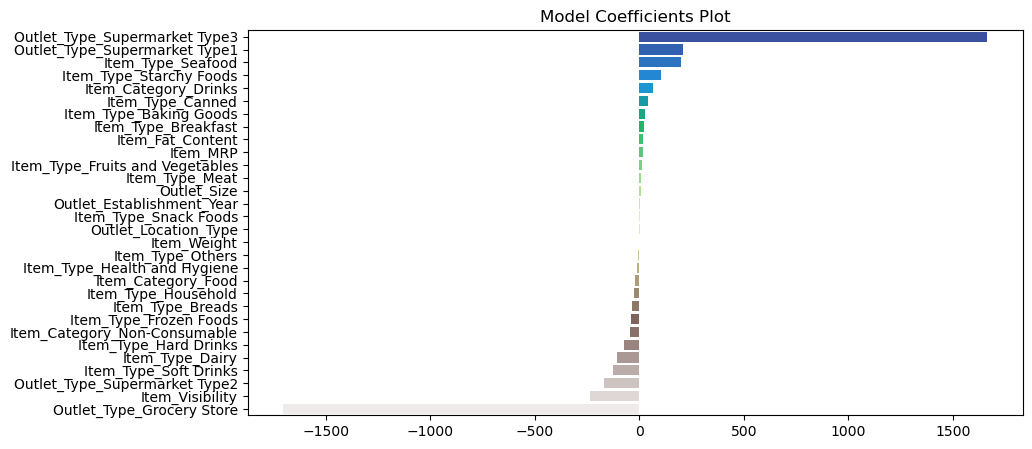

In [390]:
#create a Series with feature importances and sort it
importance_series = pd.Series(ridge_model.coef_, index=X_train.columns).sort_values(ascending=False)

#plotting the feature importances
plt.figure(figsize=(10, 5))
sns.barplot(x=importance_series.values, y=importance_series.index, palette='terrain')
plt.title('Model Coefficients Plot')
plt.show()

**Lasso Regression :**

In [391]:
#create a Lasso regression model
lasso_model = Lasso(alpha=0.1)

#fit the model to the training data
lasso_model.fit(X_train, y_train)

#predict on the validation data
y_pred = lasso_model.predict(X_valid)

#score metrics
LS_MAE = MAE(y_valid, y_pred)
LS_MSE = MSE(y_valid, y_pred)
LS_R_2 = R2(y_valid, y_pred)
print(f" Mean Absolute Error: {LS_MAE}\n")
print(f" Mean Squared Error: {LS_MSE}\n")
print(f" R^2 Score: {LS_R_2}\n")

#cross validation score
cross_val(Lasso(),X,y,5)

 Mean Absolute Error: 852.2111514888477

 Mean Squared Error: 1283195.77701539

 R^2 Score: 0.5615792976432208

Lasso() Scores:
0.57
0.55
0.55
0.56
0.56
Average Lasso() score: 0.5592


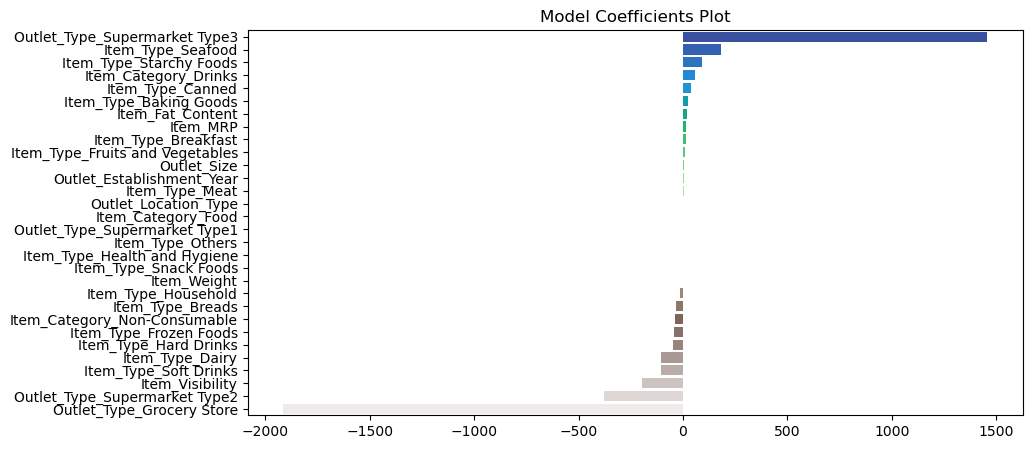

In [392]:
#create a Series with feature importances and sort it
importance_series = pd.Series(lasso_model.coef_, index=X_train.columns).sort_values(ascending=False)

#plotting the feature importances
plt.figure(figsize=(10, 5))
sns.barplot(x=importance_series.values, y=importance_series.index, palette='terrain')
plt.title('Model Coefficients Plot')
plt.show()

# Random Forest

In [393]:
#create a Random Forest regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)

#fit the model to the training data
rf_model.fit(X_train, y_train)

#predict on the validation data
y_pred = rf_model.predict(X_valid)

#score metrics
RFR_MAE = MAE(y_valid, y_pred)
RFR_MSE = MSE(y_valid, y_pred)
RFR_R_2 = R2(y_valid, y_pred)
print(f" Mean Absolute Error: {RFR_MAE}\n")
print(f" Mean Squared Error: {RFR_MSE}\n")
print(f" R^2 Score: {RFR_R_2}\n")

#cross validation score
cross_val(RandomForestRegressor(),X,y,5)

 Mean Absolute Error: 820.265147021701

 Mean Squared Error: 1322279.8753132196

 R^2 Score: 0.5482257017744976

RandomForestRegressor() Scores:
0.57
0.53
0.52
0.56
0.56
Average RandomForestRegressor() score: 0.5472


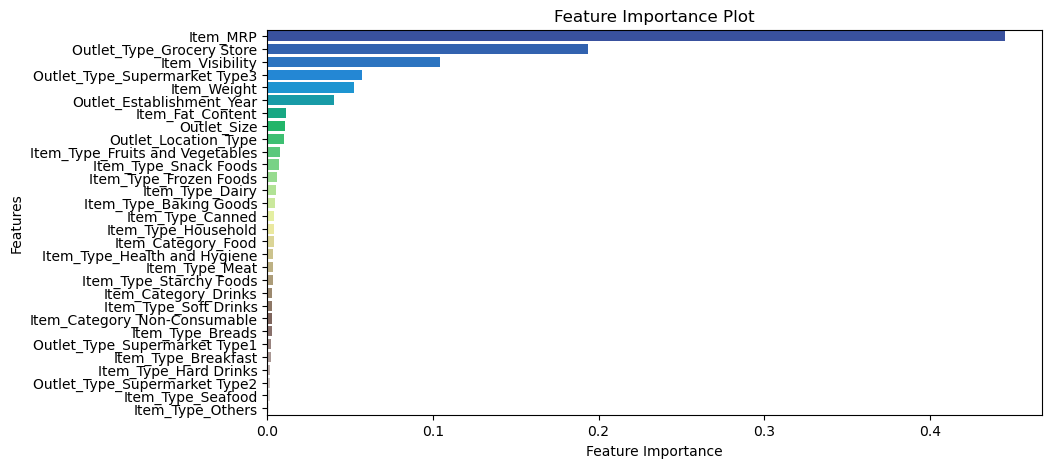

In [394]:
#create a Series with feature importances and sort it
importance_series = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

#plotting the feature importances
plt.figure(figsize=(10, 5))
sns.barplot(x=importance_series.values, y=importance_series.index, palette='terrain')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

# XGBoost and Gradient Boosting Regression

**Hyperparameter tuning for XGBoost and Gradient Boosting Regression :** 

In [395]:
xgb_params = {'learning_rate': 0.05, 'n_estimators': 100, 'random_state': 0} 
gbr_params = {'learning_rate': 0.05, 'n_estimators': 100, 'random_state': 0}  

xgb_model = XGBRegressor(**xgb_params)
gbr_model = GradientBoostingRegressor(**gbr_params)

**XGB :**

In [396]:
#create XGBoost and gradient boosting regression model
#xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.05, random_state=0)

#fit the model to the training data
xgb_model.fit(X_train, y_train)

#predict on the validation data
y_pred = xgb_model.predict(X_valid)

#score metrics
XG_MAE = MAE(y_valid, y_pred)
XG_MSE = MSE(y_valid, y_pred)
XG_R_2 = R2(y_valid, y_pred)
print(f" Mean Absolute Error: {XG_MAE}\n")
print(f" Mean Squared Error: {XG_MSE}\n")
print(f" R^2 Score: {XG_R_2}\n")

#cross validation score
cross_val(XGBRegressor(),X, y, 5)

 Mean Absolute Error: 781.2001614742944

 Mean Squared Error: 1212397.4775753827

 R^2 Score: 0.5857684671543213

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) Scores:
0.55
0.5
0.49
0.54
0.54
Average XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsampl

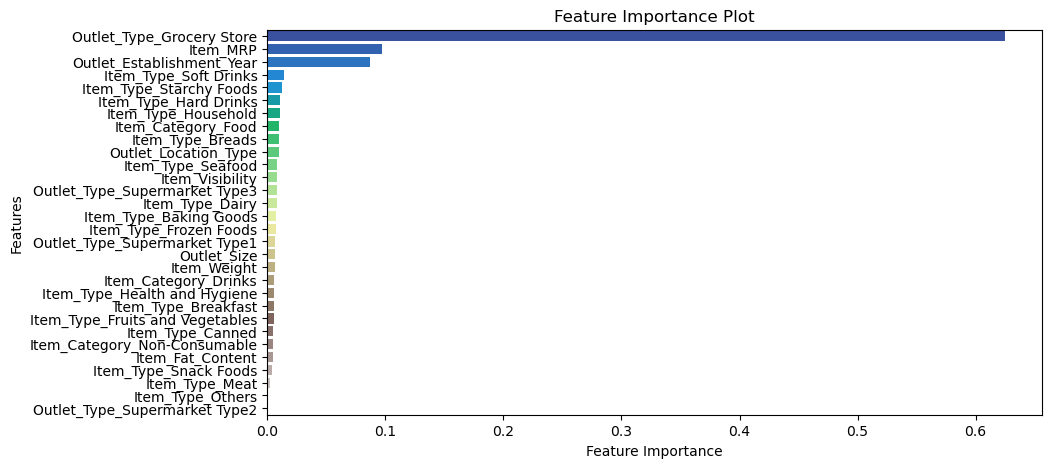

In [397]:
#create a Series with feature importances and sort it
importance_series = pd.Series(xgb_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

#plotting the feature importances
plt.figure(figsize=(10, 5))
sns.barplot(x=importance_series.values, y=importance_series.index, palette='terrain')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

**GBR :**

In [398]:
#fit the model to the training data
gbr_model.fit(X_train, y_train)

#predict on the validation data
y_pred = gbr_model.predict(X_valid)

#score metrics
GR_MAE = MAE(y_valid, y_pred)
GR_MSE = MSE(y_valid, y_pred)
GR_R_2 = R2(y_valid, y_pred)
print(f" Mean Absolute Error: {GR_MAE}\n")
print(f" Mean Squared Error: {GR_MSE}\n")
print(f" R^2 Score: {XG_R_2}\n")

#cross validation score
cross_val(GradientBoostingRegressor(),X, y, 5)

 Mean Absolute Error: 773.1361613334883

 Mean Squared Error: 1184613.0176991592

 R^2 Score: 0.5857684671543213

GradientBoostingRegressor() Scores:
0.61
0.58
0.58
0.6
0.6
Average GradientBoostingRegressor() score: 0.5938


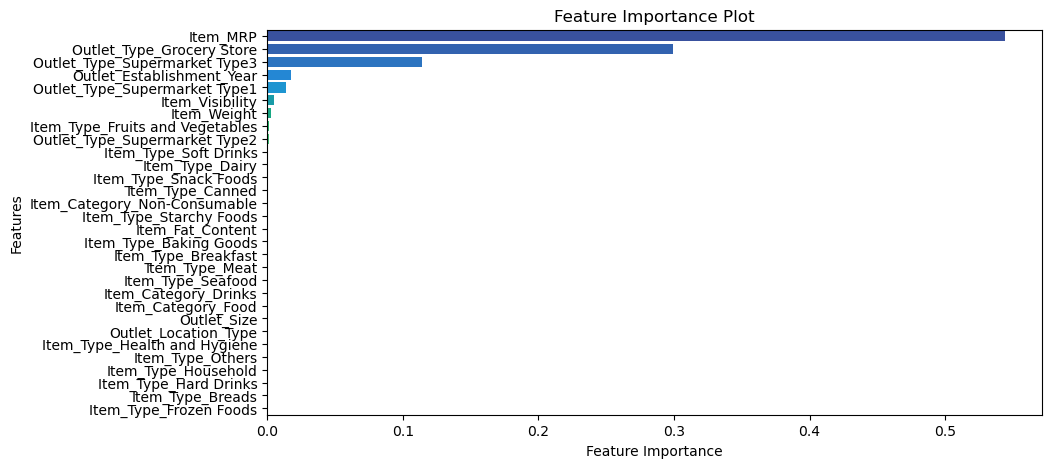

In [399]:
#create a Series with feature importances and sort it
importance_series = pd.Series(gbr_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

#plotting the feature importances
plt.figure(figsize=(10, 5))
sns.barplot(x=importance_series.values, y=importance_series.index, palette='terrain')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

# Summary

In [400]:
MAE= [LR_MAE,RR_MAE,LS_MAE,RFR_MAE,XG_MAE,GR_MAE]
MSE= [LR_MSE,RR_MSE,LS_MSE,RFR_MSE,XG_MSE,GR_MSE]
R_2= [LR_R_2,RR_R_2,LS_R_2,RFR_R_2,XG_R_2,GR_R_2]

Models = pd.DataFrame({
    'Models': ["Linear Regression","Ridge Regression","Lasso Regression","Random Forest Regressor","XGBoost","Gradient Boosting Regression"],
    'MAE': MAE, 'MSE': MSE, 'R^2':R_2})
Models.sort_values(by='MAE', ascending=True)

,Models,MAE,MSE,R^2
5,Gradient Boosting Regression,773.136161,1.184613e+06,0.595261
4,XGBoost,781.200161,1.212397e+06,0.585768
3,Random Forest Regressor,820.265147,1.322280e+06,0.548226
2,Lasso Regression,852.211151,1.283196e+06,0.561579
1,Ridge Regression,852.382915,1.283555e+06,0.561457
0,Linear Regression,852.424053,1.283591e+06,0.561444


**Analysis :**

* Gradient Boosting Regression has the best overall performance (the lowest MAE and MSE, the highest R^2), followed by XGBoost.
* For the GBR model, the feature Item_MRP has been given the highest score among all the features.

# Final Predictions On The Test Dataset

In [401]:
my_model = gbr_model
y_test_pred = my_model.predict(X_test)
pd.DataFrame(y_test_pred).head(10)

,0
0,1618.823421
1,1387.275247
2,615.979754
3,2470.226777
4,6035.691930
5,1878.119800
6,650.531525
7,2095.654678
8,1578.844599
9,3145.906429


# Saving the Final Model

In [402]:
predictions = pd.read_csv("../input/bigmart-data/Test.csv")
predictions['Item_Outlet_Sales_Pred']=y_test_pred
predictions.to_csv("Test_Pred.csv",index=False)
predictions.shape

(5681, 12)